In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
import tensorflow as tf
from tensorflow.keras import regularizers
import csv
tf.__version__

'2.3.0-dev20200515'

In [13]:
def get_data(filename, data="train"):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        next(csv_reader)
        temp_features = []
        temp_labels = []
        val_feat = []
        val_lab = []
        t = 0
        for row in csv_reader:
            if data == "train":
                if t<450:
                    temp_features.append(row[1:-2])
                    temp_labels.append(row[-1])
                    t += 1
                else:
                    val_feat.append(row[1:-2])
                    val_lab.append(row[-1])
                    
                    
            else:
                temp_features.append(row[1:-1])
                
        features = np.array(temp_features).astype('float')
        if data == "train":
            labels = np.array(temp_labels).astype('float')
            val_features = np.array(val_feat).astype('float')
            val_labels = np.array(val_lab).astype('float')
    if data == "train":    
        return features, labels, val_features, val_labels
    else:
        return features

In [14]:
training_features, training_labels, validation_features, validation_labels = get_data('Train.csv')
validation_features /= 10
training_features = training_features / 10
print(training_features.shape)
print(training_labels.shape)
print(validation_features.shape)
print(validation_labels.shape)


(450, 5)
(450,)
(93, 5)
(93,)


In [15]:
testing_features = get_data('Test.csv', data="test")
testing_features = testing_features / 10
print(testing_features.shape)

(233, 5)


In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True
        
callbacks = myCallback()

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=[5,]),
    # tf.keras.layers.Dense(250, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    # tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.Dense(250, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    # tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.Dense(250, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    # tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.Dense(200, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])



In [32]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 200)               1200      
_________________________________________________________________
dense_30 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_31 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 15)                765       
_________________________________________________________________
dropout_13 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)               

In [33]:
history = model.fit(training_features, training_labels, validation_data = (validation_features, validation_labels), epochs=100, callbacks=[callbacks])

Epoch 1/100
15/15 [==============================] - 1s 49ms/step - loss: 2.7536 - accuracy: 0.6333 - val_loss: 2.4219 - val_accuracy: 0.7312
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 2.2362 - accuracy: 0.7222 - val_loss: 2.0151 - val_accuracy: 0.7204
Epoch 3/100
15/15 [==============================] - 0s 11ms/step - loss: 1.8864 - accuracy: 0.7400 - val_loss: 1.7140 - val_accuracy: 0.7312
Epoch 4/100
15/15 [==============================] - 0s 12ms/step - loss: 1.6420 - accuracy: 0.7556 - val_loss: 1.5028 - val_accuracy: 0.7204
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 1.4134 - accuracy: 0.7600 - val_loss: 1.3437 - val_accuracy: 0.7312
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 1.2404 - accuracy: 0.7778 - val_loss: 1.2004 - val_accuracy: 0.7204
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 1.1088 - accuracy: 0.7600 - val_loss: 1.0736 - val_accuracy: 0.7312
Epoch 8/

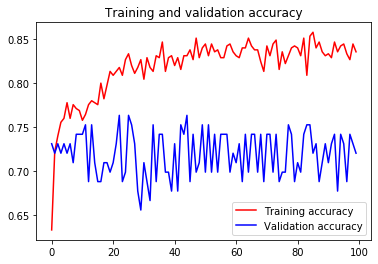

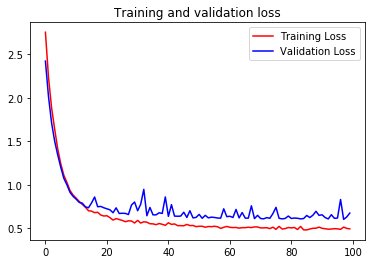

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
array = model.predict(testing_features)

In [ ]:
df = pd.DataFrame (np.around(array, decimals=3))
df.insert(1, "1", abs(np.around(array - 1, decimals=3)), "True")
## save to xlsx file

filepath = 'my_excel_file.xlsx'

df.to_excel(filepath, index=False)